In [236]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Let's first import our dataset.

In [237]:
df = pd.read_csv("D:\\data associate\\project\\DataCoSupplyChainDataset.csv",encoding='latin1')
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [238]:
df.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Product Card Id', 'Product Category Id',
       'Product De

# Columns selection

### See there are a lot of columns.
### But we don't require all the columns for our case study.
### We can drop columns related to customer details (first name, last name, email, password. etc.)
### Similarly we don't require sales per customer, delivery status,etc.
### We will drop all the unwanted columns.

In [239]:
features = ['Days for shipping (real)',
            'Days for shipment (scheduled)',
            'Category Id',
            'Customer Segment',
            'Market',
            'Order Country',
            'Order Region',
            'order date (DateOrders)',
            'Order Item Quantity',
            'Order Status',
            'Product Card Id',
            'Product Price',
           'Shipping Mode']
len(features)

13

In [240]:
df[features].head()

,Days for shipping (real),Days for shipment (scheduled),Category Id,Customer Segment,Market,Order Country,Order Region,order date (DateOrders),Order Item Quantity,Order Status,Product Card Id,Product Price,Shipping Mode
0,3,4,73,Consumer,Pacific Asia,Indonesia,Southeast Asia,1/31/2018 22:56,1,COMPLETE,1360,327.75,Standard Class
1,5,4,73,Consumer,Pacific Asia,India,South Asia,1/13/2018 12:27,1,PENDING,1360,327.75,Standard Class
2,4,4,73,Consumer,Pacific Asia,India,South Asia,1/13/2018 12:06,1,CLOSED,1360,327.75,Standard Class
3,3,4,73,Home Office,Pacific Asia,Australia,Oceania,1/13/2018 11:45,1,COMPLETE,1360,327.75,Standard Class
4,2,4,73,Corporate,Pacific Asia,Australia,Oceania,1/13/2018 11:24,1,PENDING_PAYMENT,1360,327.75,Standard Class


In [241]:
df = df[features]

# EDA

In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Days for shipping (real)       180519 non-null  int64  
 1   Days for shipment (scheduled)  180519 non-null  int64  
 2   Category Id                    180519 non-null  int64  
 3   Customer Segment               180519 non-null  object 
 4   Market                         180519 non-null  object 
 5   Order Country                  180519 non-null  object 
 6   Order Region                   180519 non-null  object 
 7   order date (DateOrders)        180519 non-null  object 
 8   Order Item Quantity            180519 non-null  int64  
 9   Order Status                   180519 non-null  object 
 10  Product Card Id                180519 non-null  int64  
 11  Product Price                  180519 non-null  float64
 12  Shipping Mode                 

In [243]:
df.describe()

,Days for shipping (real),Days for shipment (scheduled),Category Id,Order Item Quantity,Product Card Id,Product Price
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000
mean,3.497654,2.931847,31.851451,2.127638,692.509764,141.232550
std,1.623722,1.374449,15.640064,1.453451,336.446807,139.732492
min,0.000000,0.000000,2.000000,1.000000,19.000000,9.990000
25%,2.000000,2.000000,18.000000,1.000000,403.000000,50.000000
50%,3.000000,4.000000,29.000000,1.000000,627.000000,59.990002
75%,5.000000,4.000000,45.000000,3.000000,1004.000000,199.990005
max,6.000000,4.000000,76.000000,5.000000,1363.000000,1999.989990


### We see that date has been cosidered as object datatype.
### So converting them into datetime datatype.

#### Will create new columns order day,date,month, order year from the order date coulmn.


In [244]:
df['Order Day'] = pd.to_datetime(df['order date (DateOrders)']).dt.day

In [245]:
df['Order Weekday'] = pd.to_datetime(df['order date (DateOrders)']).dt.weekday

In [246]:
df['Order Date'] = pd.to_datetime(df['order date (DateOrders)']).dt.date

In [247]:
df['Order Month'] = pd.to_datetime(df['order date (DateOrders)']).dt.month

In [248]:
df['Order Year'] = pd.to_datetime(df['order date (DateOrders)']).dt.year

In [249]:
df.head()

,Days for shipping (real),Days for shipment (scheduled),Category Id,Customer Segment,Market,Order Country,Order Region,order date (DateOrders),Order Item Quantity,Order Status,Product Card Id,Product Price,Shipping Mode,Order Day,Order Weekday,Order Date,Order Month,Order Year
0,3,4,73,Consumer,Pacific Asia,Indonesia,Southeast Asia,1/31/2018 22:56,1,COMPLETE,1360,327.75,Standard Class,31,2,2018-01-31,1,2018
1,5,4,73,Consumer,Pacific Asia,India,South Asia,1/13/2018 12:27,1,PENDING,1360,327.75,Standard Class,13,5,2018-01-13,1,2018
2,4,4,73,Consumer,Pacific Asia,India,South Asia,1/13/2018 12:06,1,CLOSED,1360,327.75,Standard Class,13,5,2018-01-13,1,2018
3,3,4,73,Home Office,Pacific Asia,Australia,Oceania,1/13/2018 11:45,1,COMPLETE,1360,327.75,Standard Class,13,5,2018-01-13,1,2018
4,2,4,73,Corporate,Pacific Asia,Australia,Oceania,1/13/2018 11:24,1,PENDING_PAYMENT,1360,327.75,Standard Class,13,5,2018-01-13,1,2018


In [250]:
df.head()

,Days for shipping (real),Days for shipment (scheduled),Category Id,Customer Segment,Market,Order Country,Order Region,order date (DateOrders),Order Item Quantity,Order Status,Product Card Id,Product Price,Shipping Mode,Order Day,Order Weekday,Order Date,Order Month,Order Year
0,3,4,73,Consumer,Pacific Asia,Indonesia,Southeast Asia,1/31/2018 22:56,1,COMPLETE,1360,327.75,Standard Class,31,2,2018-01-31,1,2018
1,5,4,73,Consumer,Pacific Asia,India,South Asia,1/13/2018 12:27,1,PENDING,1360,327.75,Standard Class,13,5,2018-01-13,1,2018
2,4,4,73,Consumer,Pacific Asia,India,South Asia,1/13/2018 12:06,1,CLOSED,1360,327.75,Standard Class,13,5,2018-01-13,1,2018
3,3,4,73,Home Office,Pacific Asia,Australia,Oceania,1/13/2018 11:45,1,COMPLETE,1360,327.75,Standard Class,13,5,2018-01-13,1,2018
4,2,4,73,Corporate,Pacific Asia,Australia,Oceania,1/13/2018 11:24,1,PENDING_PAYMENT,1360,327.75,Standard Class,13,5,2018-01-13,1,2018


#### Now we no loger require the order date(DateOrders)
#### So droping it.

In [251]:
df.drop(columns=['order date (DateOrders)'],inplace=True)

### Check if there are any null values.

In [252]:
df.isna().sum()

Days for shipping (real)         0
Days for shipment (scheduled)    0
Category Id                      0
Customer Segment                 0
Market                           0
Order Country                    0
Order Region                     0
Order Item Quantity              0
Order Status                     0
Product Card Id                  0
Product Price                    0
Shipping Mode                    0
Order Day                        0
Order Weekday                    0
Order Date                       0
Order Month                      0
Order Year                       0
dtype: int64

#### So there are no null values present.

## Plotting some graph to understand dataset.


### Plots of product Price

<Axes: title={'center': 'Boxplot of Product Price'}, xlabel='Product Price'>

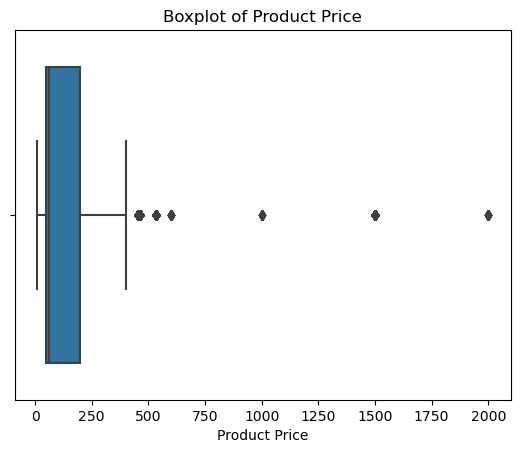

In [253]:
plt.title('Boxplot of Product Price')
sns.boxplot(x=df['Product Price'])

C:\Users\HP\AppData\Local\Temp\ipykernel_29948\1214630807.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Product Price'])


<Axes: title={'center': 'Distribustion of Product Price'}, xlabel='Product Price', ylabel='Density'>

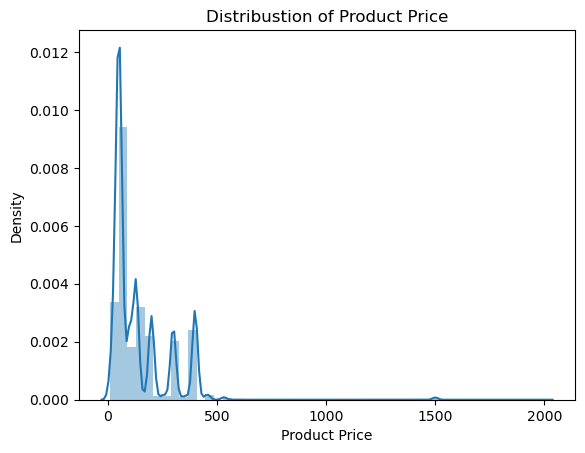

In [254]:
plt.title('Distribustion of Product Price')
sns.distplot(df['Product Price'])

In [255]:
Q1 = df['Product Price'].quantile(0.25)
Q3 = df['Product Price'].quantile(0.75)
IQR = Q3-Q1
LL = Q1-1.5*IQR
UL = Q3+1.5*IQR

In [256]:
df[(df['Product Price']<LL) | (df['Product Price']>UL)]

,Days for shipping (real),Days for shipment (scheduled),Category Id,Customer Segment,Market,Order Country,Order Region,Order Item Quantity,Order Status,Product Card Id,Product Price,Shipping Mode,Order Day,Order Weekday,Order Date,Order Month,Order Year
146,4,2,62,Consumer,Europe,Alemania,Western Europe,1,COMPLETE,1349,452.040008,Second Class,14,5,2017-10-14,10,2017
148,6,2,62,Consumer,Europe,Alemania,Western Europe,1,COMPLETE,1349,452.040008,Second Class,16,0,2017-10-16,10,2017
150,6,2,62,Consumer,Europe,Italia,Southern Europe,1,COMPLETE,1349,452.040008,Second Class,13,4,2017-10-13,10,2017
152,5,2,64,Consumer,Europe,Reino Unido,Northern Europe,1,COMPLETE,1351,1500.000000,Second Class,29,6,2017-10-29,10,2017
153,2,2,62,Consumer,Europe,Francia,Western Europe,1,COMPLETE,1349,452.040008,Second Class,13,4,2017-10-13,10,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176803,0,0,68,Consumer,Pacific Asia,Australia,Oceania,1,COMPLETE,1355,532.580017,Same Day,18,5,2017-11-18,11,2017
179067,4,2,62,Home Office,Europe,Francia,Western Europe,1,PENDING_PAYMENT,1349,452.040008,Second Class,11,2,2017-10-11,10,2017
179070,6,2,62,Home Office,Europe,Suiza,Western Europe,1,PENDING_PAYMENT,1349,452.040008,Second Class,11,2,2017-10-11,10,2017
179217,2,2,62,Home Office,Pacific Asia,Australia,Oceania,1,PENDING_PAYMENT,1349,452.040008,Second Class,21,3,2017-12-21,12,2017


In [257]:
(2048/df.shape[0])*100

1.1345066170320022

In [258]:
df.head()

,Days for shipping (real),Days for shipment (scheduled),Category Id,Customer Segment,Market,Order Country,Order Region,Order Item Quantity,Order Status,Product Card Id,Product Price,Shipping Mode,Order Day,Order Weekday,Order Date,Order Month,Order Year
0,3,4,73,Consumer,Pacific Asia,Indonesia,Southeast Asia,1,COMPLETE,1360,327.75,Standard Class,31,2,2018-01-31,1,2018
1,5,4,73,Consumer,Pacific Asia,India,South Asia,1,PENDING,1360,327.75,Standard Class,13,5,2018-01-13,1,2018
2,4,4,73,Consumer,Pacific Asia,India,South Asia,1,CLOSED,1360,327.75,Standard Class,13,5,2018-01-13,1,2018
3,3,4,73,Home Office,Pacific Asia,Australia,Oceania,1,COMPLETE,1360,327.75,Standard Class,13,5,2018-01-13,1,2018
4,2,4,73,Corporate,Pacific Asia,Australia,Oceania,1,PENDING_PAYMENT,1360,327.75,Standard Class,13,5,2018-01-13,1,2018


### Customer Segment Plots

In [259]:
df['Customer Segment'].value_counts()

Customer Segment
Consumer       93504
Corporate      54789
Home Office    32226
Name: count, dtype: int64

<Axes: title={'center': 'Share of Customer Segment'}, ylabel='count'>

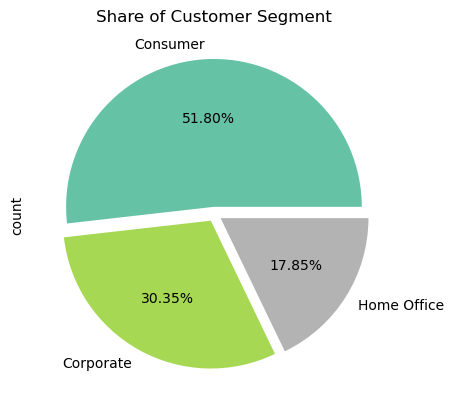

In [260]:
plt.title('Share of Customer Segment')
df['Customer Segment'].value_counts().plot(kind = 'pie', autopct = '%.2f%%', cmap = 'Set2',explode = [0.05, 0.05, 0.05])

### Plots of Market

In [261]:
df['Market'].value_counts()

Market
LATAM           51594
Europe          50252
Pacific Asia    41260
USCA            25799
Africa          11614
Name: count, dtype: int64

<Axes: title={'center': 'Market shares'}, ylabel='count'>

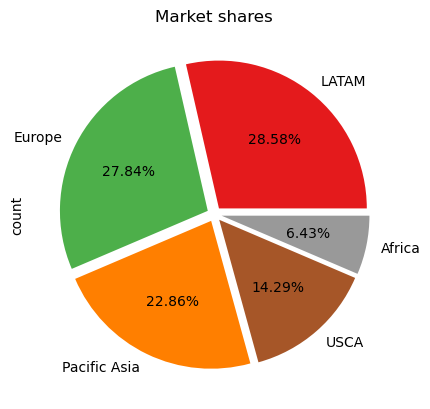

In [262]:
plt.title('Market shares')
df['Market'].value_counts().plot(kind='pie',autopct = '%.2f%%', cmap = 'Set1',explode = [0.05, 0.05, 0.05,0.05,0.05])

In [263]:
df['Order Year'].value_counts()

Order Year
2015    62650
2016    62550
2017    53196
2018     2123
Name: count, dtype: int64

<Axes: xlabel='Order Year', ylabel='count'>

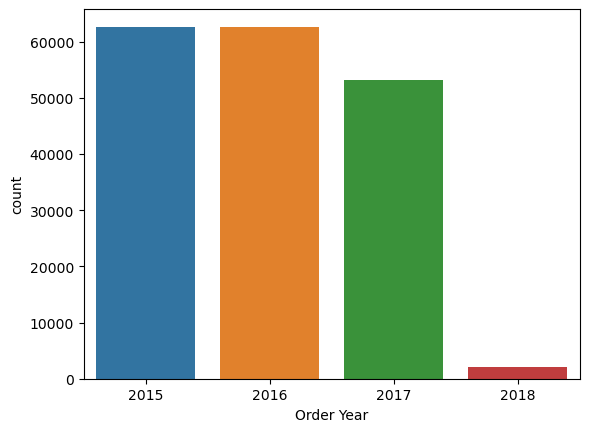

In [264]:
sns.countplot(data=df, x='Order Year')

In [265]:
df[df['Order Year']==2018]

,Days for shipping (real),Days for shipment (scheduled),Category Id,Customer Segment,Market,Order Country,Order Region,Order Item Quantity,Order Status,Product Card Id,Product Price,Shipping Mode,Order Day,Order Weekday,Order Date,Order Month,Order Year
0,3,4,73,Consumer,Pacific Asia,Indonesia,Southeast Asia,1,COMPLETE,1360,327.750000,Standard Class,31,2,2018-01-31,1,2018
1,5,4,73,Consumer,Pacific Asia,India,South Asia,1,PENDING,1360,327.750000,Standard Class,13,5,2018-01-13,1,2018
2,4,4,73,Consumer,Pacific Asia,India,South Asia,1,CLOSED,1360,327.750000,Standard Class,13,5,2018-01-13,1,2018
3,3,4,73,Home Office,Pacific Asia,Australia,Oceania,1,COMPLETE,1360,327.750000,Standard Class,13,5,2018-01-13,1,2018
4,2,4,73,Corporate,Pacific Asia,Australia,Oceania,1,PENDING_PAYMENT,1360,327.750000,Standard Class,13,5,2018-01-13,1,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176826,1,0,75,Consumer,Pacific Asia,Australia,Oceania,1,COMPLETE,1362,39.750000,Same Day,19,4,2018-01-19,1,2018
176827,0,0,75,Consumer,Pacific Asia,India,South Asia,1,COMPLETE,1362,39.750000,Same Day,22,0,2018-01-22,1,2018
176828,0,0,75,Consumer,Pacific Asia,India,South Asia,1,COMPLETE,1362,39.750000,Same Day,19,4,2018-01-19,1,2018
176837,0,0,75,Consumer,Pacific Asia,Australia,Oceania,1,ON_HOLD,1362,39.750000,Same Day,21,6,2018-01-21,1,2018


In [266]:
df.drop(df[df['Order Year']==2018].index, axis=0, inplace=True)

In [267]:
df.shape

(178396, 17)

### PLots for Regions

In [268]:
df['Order Region'].value_counts()

Order Region
Central America    28341
Western Europe     27109
South America      14935
Northern Europe     9792
Oceania             9595
Southern Europe     9431
Southeast Asia      8889
Caribbean           8318
West of USA         7993
South Asia          7268
East of USA         6915
Eastern Asia        6823
West Asia           6009
US Center           5887
South of  USA       4045
Eastern Europe      3920
West Africa         3696
North Africa        3232
East Africa         1852
Central Africa      1677
Southern Africa     1157
Canada               959
Central Asia         553
Name: count, dtype: int64

In [269]:
order = df['Order Region'].value_counts().index

<Axes: xlabel='count', ylabel='Order Region'>

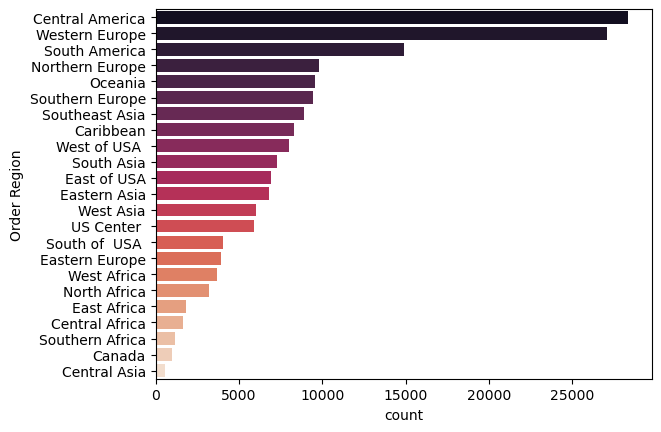

In [270]:
sns.countplot(data=df, y='Order Region',order=order, palette='rocket')

### Plots for Countries

In [271]:
df['Order Country'].value_counts()[:20]

Order Country
Estados Unidos          24840
Francia                 13222
México                  13172
Alemania                 9564
Brasil                   7987
Australia                7954
Reino Unido              7302
China                    5397
Italia                   4989
India                    4408
Indonesia                3918
España                   3868
El Salvador              3726
República Dominicana     3669
Honduras                 3629
Cuba                     3534
Turquía                  3395
Nicaragua                3046
Guatemala                2778
Nigeria                  2309
Name: count, dtype: int64

Text(0.5, 0, 'Total Order Quantity')

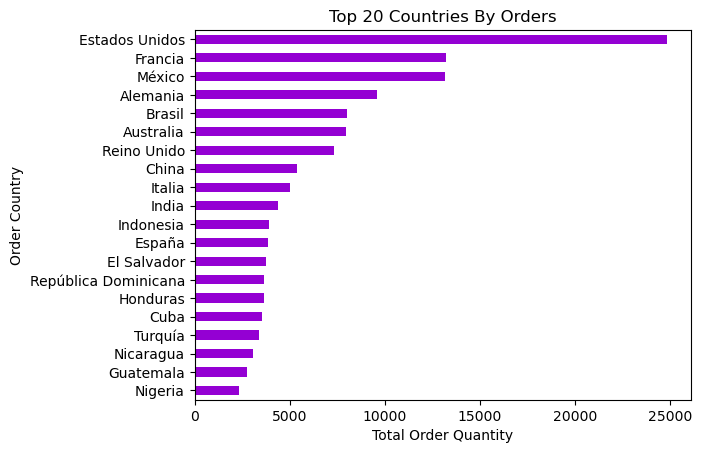

In [272]:
plt.title('Top 20 Countries By Orders')
df['Order Country'].value_counts()[:20].sort_values(ascending=True).plot(kind='barh',color='darkviolet')
plt.xlabel('Total Order Quantity')

### Plot For Number Of Quantities Ordered

In [273]:
df['Order Item Quantity'].value_counts()

Order Item Quantity
1    97011
5    20385
3    20350
4    20335
2    20315
Name: count, dtype: int64

In [274]:
order = df['Order Item Quantity'].value_counts().index

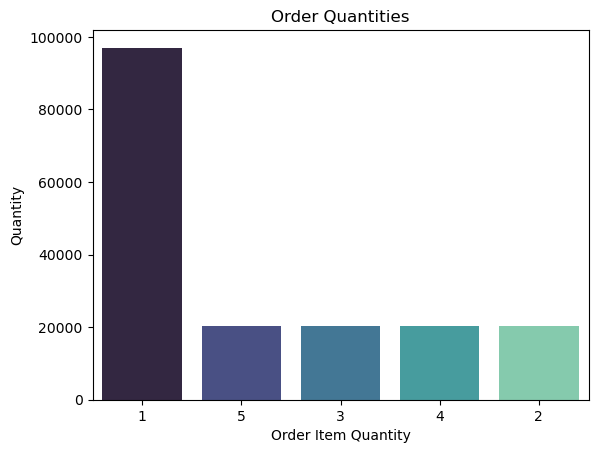

In [275]:
plt.title('Order Quantities')
sns.countplot(data=df, x='Order Item Quantity',order=order,palette='mako')
plt.ylabel('Quantity')
plt.show()

### PLot For Product Card Id

In [276]:
df['Product Card Id'].value_counts()

Product Card Id
365     24515
403     22246
502     21035
1014    19298
1004    17325
        ...  
127        27
208        15
860        11
60         10
226        10
Name: count, Length: 118, dtype: int64

In [277]:
order = list(df['Product Card Id'].value_counts().sort_values()[:20].index)

<Axes: xlabel='count', ylabel='Product Card Id'>

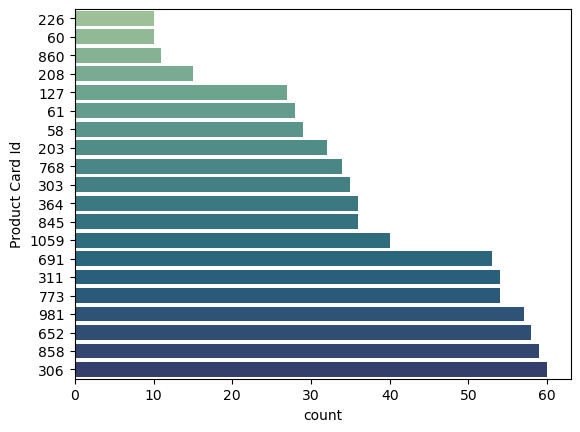

In [278]:

sns.countplot(data=df, y='Product Card Id',order=order, palette='crest')

<Axes: xlabel='Shipping Mode', ylabel='count'>

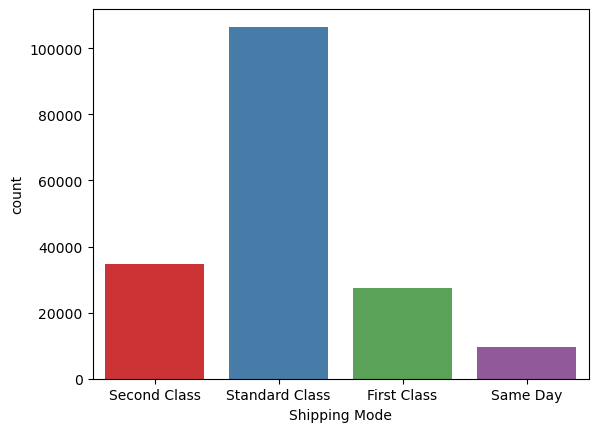

In [279]:
sns.countplot(data=df, x='Shipping Mode',palette='Set1')

<Axes: xlabel='count', ylabel='Order Status'>

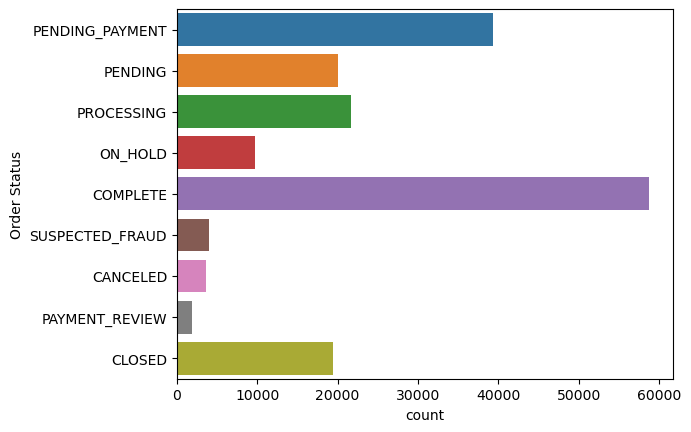

In [280]:
sns.countplot(data=df, y='Order Status')

In [281]:
df.head()

,Days for shipping (real),Days for shipment (scheduled),Category Id,Customer Segment,Market,Order Country,Order Region,Order Item Quantity,Order Status,Product Card Id,Product Price,Shipping Mode,Order Day,Order Weekday,Order Date,Order Month,Order Year
48,5,2,17,Home Office,Pacific Asia,India,South Asia,2,PENDING_PAYMENT,365,59.990002,Second Class,24,2,2016-02-24,2,2016
49,2,2,29,Home Office,Pacific Asia,Turquía,West Asia,2,PENDING_PAYMENT,627,39.990002,Second Class,25,1,2016-10-25,10,2016
50,6,2,24,Home Office,Pacific Asia,Australia,Oceania,2,PENDING_PAYMENT,502,50.000000,Second Class,30,2,2016-03-30,3,2016
51,2,2,29,Home Office,Pacific Asia,Turquía,West Asia,2,PENDING_PAYMENT,627,39.990002,Second Class,30,6,2016-10-30,10,2016
52,3,2,24,Home Office,Pacific Asia,Mongolia,Eastern Asia,2,PENDING_PAYMENT,502,50.000000,Second Class,28,0,2016-11-28,11,2016


<Axes: >

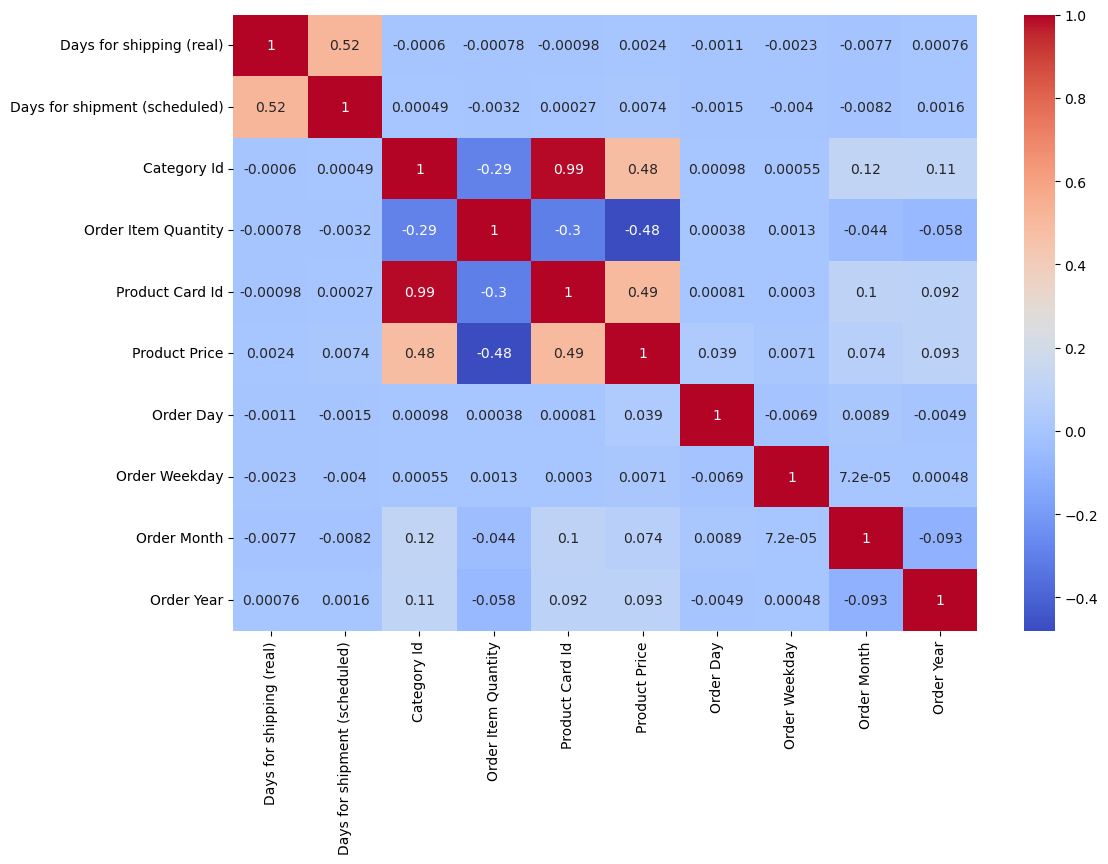

In [282]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm')

<Axes: xlabel='Product Price', ylabel='Order Item Quantity'>

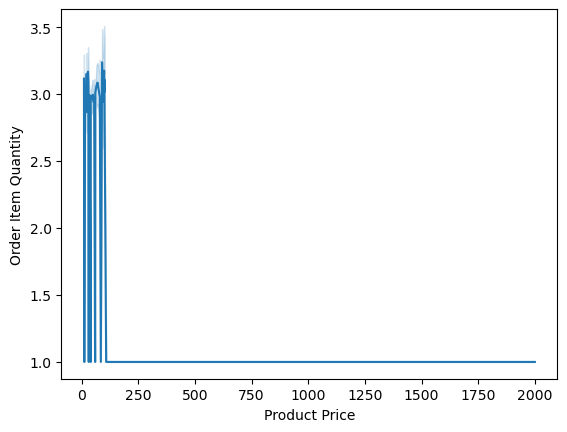

In [283]:
sns.lineplot(data=df, y='Order Item Quantity', x='Product Price')

<Axes: xlabel='Category Id', ylabel='Order Item Quantity'>

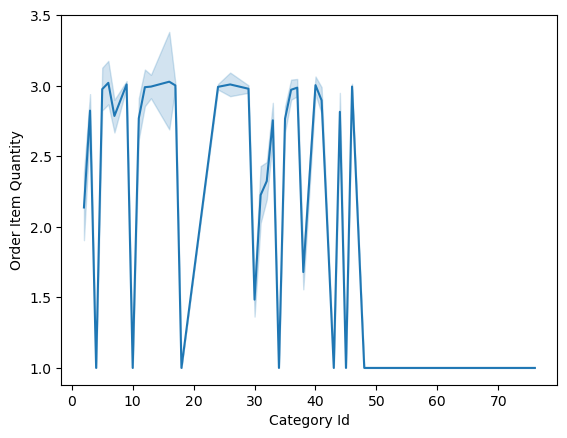

In [284]:
sns.lineplot(data=df, y='Order Item Quantity', x='Category Id')

<Axes: xlabel='Product Card Id', ylabel='Order Item Quantity'>

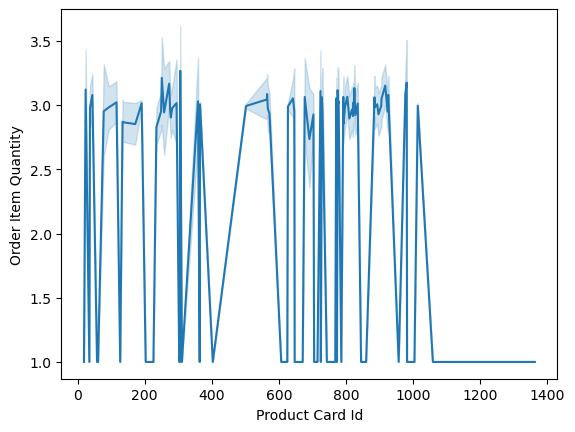

In [285]:
sns.lineplot(data=df, y='Order Item Quantity', x='Product Card Id')

In [286]:
df[df['Order Year']==2018]

,Days for shipping (real),Days for shipment (scheduled),Category Id,Customer Segment,Market,Order Country,Order Region,Order Item Quantity,Order Status,Product Card Id,Product Price,Shipping Mode,Order Day,Order Weekday,Order Date,Order Month,Order Year


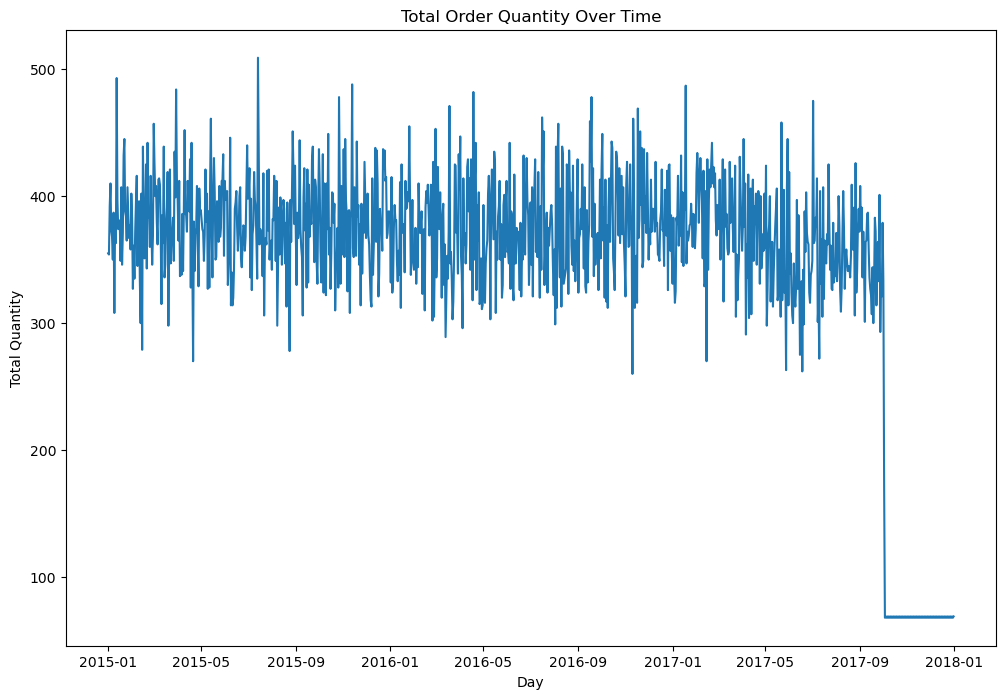

In [291]:
plt.figure(figsize=(12, 8))
daily_orders= df.groupby(['Order Date'])['Order Item Quantity'].sum().reset_index()
sns.lineplot(data=daily_orders, x='Order Date', y='Order Item Quantity')
plt.title('Total Order Quantity Over Time')
plt.xlabel('Day')
plt.ylabel('Total Quantity')
plt.show()

<Axes: xlabel='Order Item Quantity'>

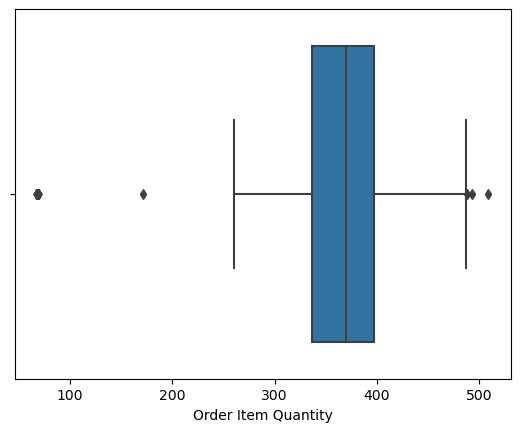

In [292]:
sns.boxplot(data=daily_orders, x='Order Item Quantity')

In [293]:
daily_orders_filtered = daily_orders.copy()

In [300]:
Q1 = daily_orders_filtered['Order Item Quantity'].quantile(0.25)
Q3 = daily_orders_filtered['Order Item Quantity'].quantile(0.75)

IQR = Q3-Q1

LL = Q1 - IQR*1.5
UP = Q3 + IQR*1.5


In [301]:
filtered_daily_orders = daily_orders_filtered[(daily_orders_filtered['Order Item Quantity']>=LL) & (daily_orders_filtered['Order Item Quantity']<=UP)]
filtered_daily_orders.head()

,Order Date,Order Item Quantity
0,2015-01-01,355
1,2015-01-02,354
2,2015-01-03,392
3,2015-01-04,410
4,2015-01-05,373


In [302]:
filtered_daily_orders.shape

(1002, 2)

<Axes: xlabel='Order Item Quantity'>

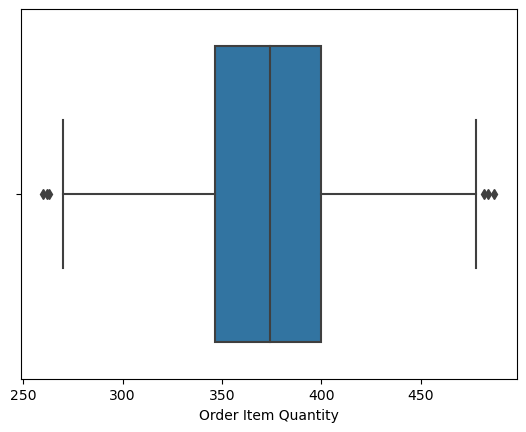

In [303]:
sns.boxplot(data=filtered_daily_orders, x='Order Item Quantity')

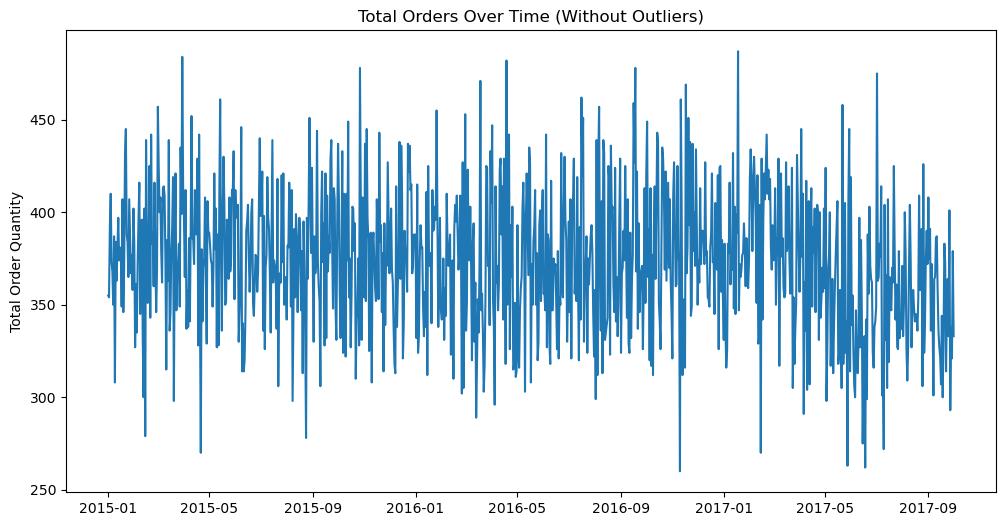

In [304]:
plt.figure(figsize=(12, 6))
plt.plot(filtered_daily_orders['Order Date'], filtered_daily_orders['Order Item Quantity'])
plt.title('Total Orders Over Time (Without Outliers)')
plt.ylabel('Total Order Quantity')
plt.show()

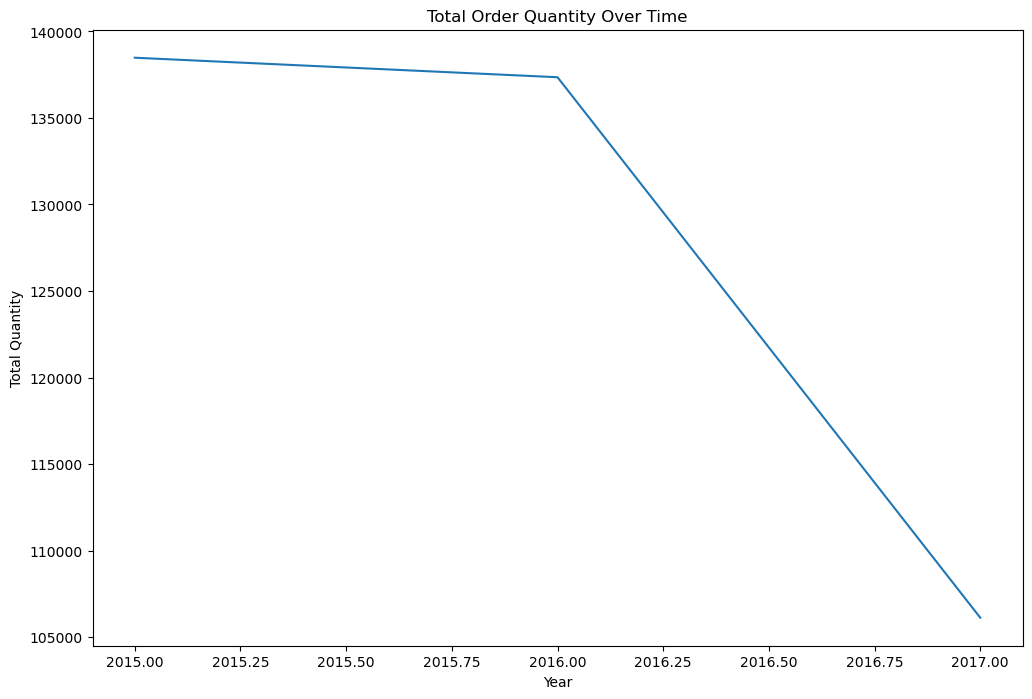

In [305]:
plt.figure(figsize=(12, 8))
yearly_orders= df.groupby(['Order Year'])['Order Item Quantity'].sum().reset_index()
sns.lineplot(data=yearly_orders, x='Order Year', y='Order Item Quantity')
plt.title('Total Order Quantity Over Time')
plt.xlabel('Year')
plt.ylabel('Total Quantity')
plt.show()

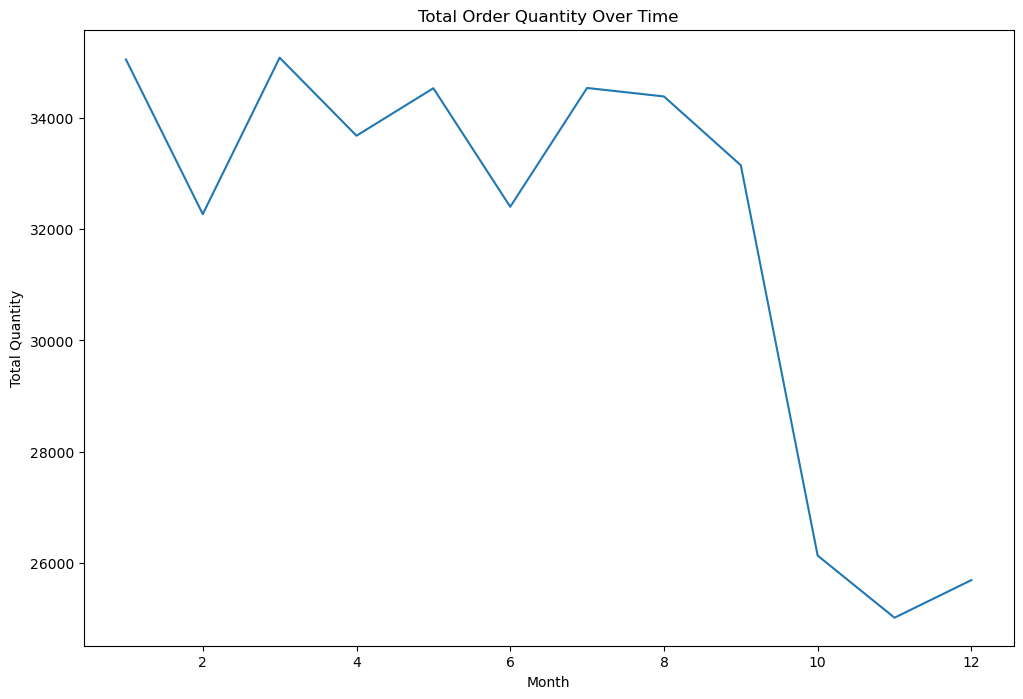

In [306]:
plt.figure(figsize=(12, 8))
monthly_orders= df.groupby(['Order Month'])['Order Item Quantity'].sum().reset_index()
sns.lineplot(data=monthly_orders, x='Order Month', y='Order Item Quantity')
plt.title('Total Order Quantity Over Time')
plt.xlabel('Month')
plt.ylabel('Total Quantity')
plt.show()